In [10]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager

# Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# Visit the Mars Facts site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

html = browser.html
new_soup = soup(html, 'html.parser')

[WDM] - Downloading: 100%|██████████| 8.41M/8.41M [00:00<00:00, 23.2MB/s]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
new_soup.title

<title>Mars Temperature Data</title>

In [15]:
mars_temperature = new_soup.title.text
print(mars_temperature)

Mars Temperature Data


In [16]:
table = new_soup.find_all('tr', class_='data-row')
print(table)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

In [32]:
mars_temp = []

for row in table:
    row_data = row.find_all('td')
    r=[]
    for data in row_data:
        r.append(data.text)
    mars_temp.append(r)


   

In [35]:
df= pd.DataFrame(mars_temp, columns=['id','terrestial_data','sol','ls','month','min_temp','pressure'])

In [36]:
df.head()

,id,terrestial_data,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [34]:
for info in table:
    
    table_content = info.find("td")
    # temp_dict={}
    # temp_dict['id']= id
    # temp_dict['terrestial_date']= terrestial_date
    # temp_dict['sol']=sol
    # temp_dict['ls']= ls
    # temp_dict['month']= month
    # temp_dict['min_temp']= min_temp
    # temp_dict['pressure']= pressure
    # mars_temp.append(temp_dict)
    print(table_content)


<td>2</td>
<td>13</td>
<td>24</td>
<td>35</td>
<td>46</td>
<td>57</td>
<td>68</td>
<td>79</td>
<td>112</td>
<td>114</td>
<td>123</td>
<td>134</td>
<td>145</td>
<td>156</td>
<td>163</td>
<td>170</td>
<td>171</td>
<td>172</td>
<td>173</td>
<td>175</td>
<td>176</td>
<td>177</td>
<td>178</td>
<td>179</td>
<td>180</td>
<td>181</td>
<td>182</td>
<td>183</td>
<td>184</td>
<td>185</td>
<td>186</td>
<td>187</td>
<td>188</td>
<td>189</td>
<td>190</td>
<td>191</td>
<td>192</td>
<td>193</td>
<td>194</td>
<td>195</td>
<td>196</td>
<td>197</td>
<td>198</td>
<td>199</td>
<td>200</td>
<td>201</td>
<td>202</td>
<td>203</td>
<td>204</td>
<td>205</td>
<td>206</td>
<td>207</td>
<td>208</td>
<td>209</td>
<td>210</td>
<td>211</td>
<td>212</td>
<td>213</td>
<td>214</td>
<td>215</td>
<td>216</td>
<td>217</td>
<td>218</td>
<td>219</td>
<td>220</td>
<td>221</td>
<td>222</td>
<td>223</td>
<td>224</td>
<td>225</td>
<td>226</td>
<td>227</td>
<td>228</td>
<td>229</td>
<td>230</td>
<td>231</td>
<td>233</td>
<td>234<

In [41]:
df.terrestial_data = pd.to_datetime(df.terrestial_data)

In [42]:
df.sol = df.sol.astype('int')

In [44]:
df.min_temp = df.min_temp.astype('float')

In [45]:
df.pressure = df.pressure.astype('float')

In [46]:
df.ls = df.ls.astype('int')

In [50]:
df.month = df.month.astype('int')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               1867 non-null   object        
 1   terrestial_data  1867 non-null   datetime64[ns]
 2   sol              1867 non-null   int64         
 3   ls               1867 non-null   int64         
 4   month            1867 non-null   int64         
 5   min_temp         1867 non-null   float64       
 6   pressure         1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


In [53]:
df["month"].value_counts().sort_index()

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [56]:
df.sol.nunique()

1867

In [83]:
avg_min_temp_df = df.groupby('month')['min_temp'].mean()
avg_min_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [84]:
avg_min_temp2_df = df.groupby('month')[['month', 'min_temp']].mean()
avg_min_temp2_df

,month,min_temp
month,,
1,1.0,-77.160920
2,2.0,-79.932584
3,3.0,-83.307292
4,4.0,-82.747423
5,5.0,-79.308725
6,6.0,-75.299320
7,7.0,-72.281690
8,8.0,-68.382979
9,9.0,-69.171642


In [79]:
avg_min_temp_df

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Average Temperature')

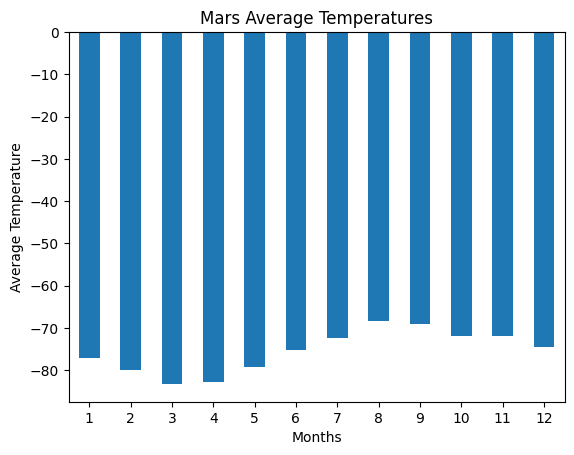

In [87]:
temp_chart_df = avg_min_temp_df.plot.bar(y="min_temp", rot=0)
plt.title("Mars Average Temperatures")
plt.xlabel("Months")
plt.ylabel("Average Temperature")


In [62]:
avg_pressure_df = df.groupby('month')['pressure'].mean()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

Text(0, 0.5, 'Average Pressure')

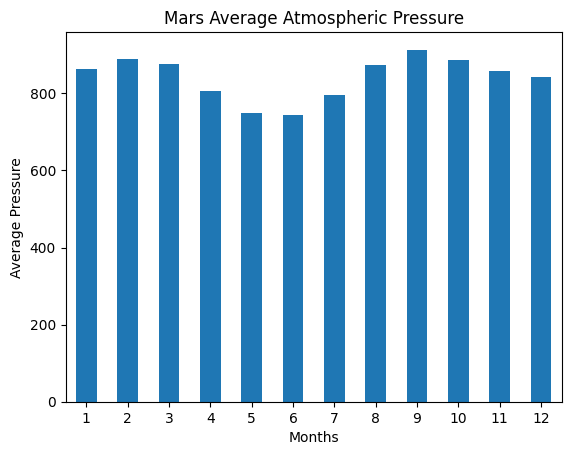

In [88]:
pressure_chart_df = avg_pressure_df.plot.bar(y="pressure", rot=0)
plt.title("Mars Average Atmospheric Pressure")
plt.xlabel("Months")
plt.ylabel("Average Pressure")

Text(0, 0.5, 'min_temp')

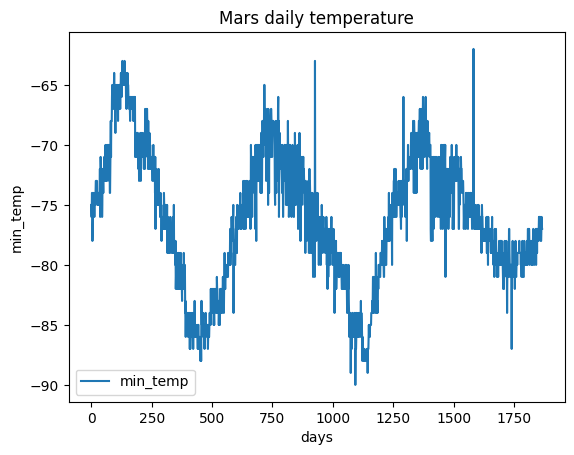

In [91]:
daily_temp_df = df.plot.line(y="min_temp", rot=0)
plt.title("Mars daily temperature")
plt.xlabel("days")
plt.ylabel("min_temp")

In [92]:
df.to_csv('mars_data.csv')